In [ ]:
!pip install opendatasets
import opendatasets as od
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.utils import shuffle
%matplotlib inline

dataset = 'https://www.kaggle.com/datasets/anshulmehtakaggl/chess-pieces-detection-images-dataset'
od.download(dataset)

In [2]:
data_dir = './chess-pieces-detection-images-dataset'
os.listdir(data_dir)

['knight-resize',
 'Rook-resize',
 'bishop_resized',
 'pawn_resized',
 'Queen-Resized']

In [36]:
# membuat list kosong untuk gambar dan nama label
image_path = []
labels = []

# melakukan loop setiap kategori
for label, category in enumerate(os.listdir(data_dir)):
  category_path = os.path.join(data_dir, category)

  #melakukan loop pada setiap gambar
  for img_file in os.listdir(category_path):
    img_path = os.path.join(category_path, img_file)

    # membaca gambar dengan librari cv2
    img = cv2.imread(img_path)

    # melakukan resize gambar (64*64)
    img_resized = cv2.resize(img,(64,64))

    # mengkonversikan gambar ke array
    img_array =cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # menyimpan array gambar dan label kedalam list
    image_path.append(img_array)
    labels.append(label)

# mengkonversi list ke array lalu melakukan reshape
image_path = np.array(image_path)
labels = np.array(labels)

In [37]:
image_path.shape # jumlah gambar sebanyak 651 yang memiliki dimensi 64*64 dengan 3 saluran warna

(651, 64, 64, 3)

In [39]:
# membagi data train dan test
from sklearn.utils import shuffle
X, y = shuffle(image_path, labels, random_state =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Jumlah X_train:',len(X_train))
print('Jumlah X_test:',len(X_test))

Jumlah X_train: 520
Jumlah X_test: 131


In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(520, 64, 64, 3)
(131, 64, 64, 3)
(520,)
(131,)


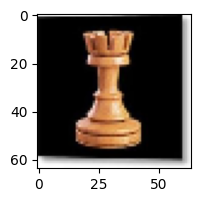

In [41]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[4])

In [42]:
X_train[4]

array([[[249, 249, 249],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [252, 252, 252],
        [253, 253, 253],
        [254, 254, 254]],

       [[ 33,  33,  33],
        [ 31,  31,  31],
        [ 30,  30,  30],
        ...,
        [231, 231, 231],
        [246, 246, 246],
        [253, 253, 253]],

       [[  9,   9,   9],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [201, 201, 201],
        [231, 231, 231],
        [249, 249, 249]],

       ...,

       [[252, 252, 252],
        [246, 246, 246],
        [235, 235, 235],
        ...,
        [199, 199, 199],
        [231, 231, 231],
        [246, 246, 246]],

       [[255, 255, 255],
        [254, 254, 254],
        [252, 252, 252],
        ...,
        [236, 236, 236],
        [243, 243, 243],
        [252, 252, 252]],

       [[253, 253, 253],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [249, 249, 249],
        [252, 252, 252],
        [253, 253, 253]]

### Normalisasi data

In [43]:
# melakukan standarisasi
X_train = X_train/255.0
X_test = X_test/255.0

### Menggunakan model ANN

In [45]:
ann = models.Sequential([
        layers.Flatten(input_shape=(64,64,3)),
        layers.Dense(5000, activation='relu'),
        layers.Dense(3000, activation='relu'),
        layers.Dense(5, activation='sigmoid')
    ])
ann.compile(optimizer ='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=10)
#Hasil setelah dilakukan permodelan tingkat akurasi sebesar 0.51(lemah)

Epoch 1/10
17/17 [==============================] - 9s 459ms/step - loss: 3.5881 - accuracy: 0.2308
Epoch 2/10
17/17 [==============================] - 12s 701ms/step - loss: 1.5818 - accuracy: 0.3000
Epoch 3/10
17/17 [==============================] - 10s 576ms/step - loss: 1.4949 - accuracy: 0.3731
Epoch 4/10
17/17 [==============================] - 10s 577ms/step - loss: 1.4489 - accuracy: 0.3962
Epoch 5/10
17/17 [==============================] - 12s 658ms/step - loss: 1.4274 - accuracy: 0.4462
Epoch 6/10
17/17 [==============================] - 13s 732ms/step - loss: 1.3928 - accuracy: 0.4462
Epoch 7/10
17/17 [==============================] - 11s 661ms/step - loss: 1.3651 - accuracy: 0.4462
Epoch 8/10
17/17 [==============================] - 8s 465ms/step - loss: 1.3298 - accuracy: 0.5154
Epoch 9/10
17/17 [==============================] - 11s 653ms/step - loss: 1.2924 - accuracy: 0.5231
Epoch 10/10
17/17 [==============================] - 10s 581ms/step - loss: 1.2787 - accuracy

In [46]:
ann.evaluate(X_test,y_test) # nilai evaluasi dengan menggunkan model ANN sebesar 0.30


5/5 [==============================] - 1s 119ms/step - loss: 1.5696 - accuracy: 0.2977


[1.5696202516555786, 0.2977099120616913]

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))

5/5 [==============================] - 1s 114ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.46      0.43        41
           1       0.00      0.00      0.00        32
           2       0.19      0.62      0.29        26
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        19

    accuracy                           0.27       131
   macro avg       0.12      0.22      0.14       131
weighted avg       0.16      0.27      0.19       131



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Menggunakan model CNN

In [53]:
cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size =(3,3), activation='relu',input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(5000, activation='relu'),
    layers.Dense(3000, activation='relu'),
    layers.Dense(5, activation='sigmoid')
    ])
cnn.compile(optimizer ='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)
#Hasil setelah dilakukan permodelan tingkat akurasi sebesar 0.95(baik)

Epoch 1/10
17/17 [==============================] - 30s 2s/step - loss: 3.1885 - accuracy: 0.2577
Epoch 2/10
17/17 [==============================] - 27s 2s/step - loss: 1.5748 - accuracy: 0.2788
Epoch 3/10
17/17 [==============================] - 27s 2s/step - loss: 1.4709 - accuracy: 0.3827
Epoch 4/10
17/17 [==============================] - 26s 2s/step - loss: 1.2063 - accuracy: 0.5269
Epoch 5/10
17/17 [==============================] - 25s 1s/step - loss: 0.8822 - accuracy: 0.6481
Epoch 6/10
17/17 [==============================] - 26s 2s/step - loss: 0.6491 - accuracy: 0.7442
Epoch 7/10
17/17 [==============================] - 27s 2s/step - loss: 0.4355 - accuracy: 0.8154
Epoch 8/10
17/17 [==============================] - 28s 2s/step - loss: 0.2649 - accuracy: 0.8981
Epoch 9/10
17/17 [==============================] - 25s 1s/step - loss: 0.2382 - accuracy: 0.9058
Epoch 10/10
17/17 [==============================] - 26s 1s/step - loss: 0.1439 - accuracy: 0.9577


In [54]:
cnn.evaluate(X_test,y_test) # nilai evaluasi dengan menggunkan model CNN sebesar 0.53 mengalami peningkatan

5/5 [==============================] - 1s 149ms/step - loss: 2.4847 - accuracy: 0.5344


[2.484720468521118, 0.5343511700630188]

In [55]:
ypred = cnn.predict(X_test)
ypred[:3]

5/5 [==============================] - 1s 148ms/step


array([[0.60293037, 0.9420229 , 0.0382219 , 0.71123755, 0.5418884 ],
       [0.9984555 , 0.12311606, 0.03034751, 0.00142243, 0.99560606],
       [0.30054253, 0.31426665, 0.2913994 , 0.09325589, 0.9974049 ]],
      dtype=float32)

In [56]:
y_classes = [np.argmax(element) for element in ypred]
y_classes[:3]

[1, 0, 4]

In [57]:
y_test[:3] # hasil kurang sesuai dengan prediksi y_classes dimana 4 harusnya 3

array([1, 0, 3])

In [58]:
print('Classificaion Report: \n', classification_report(y_test,y_classes))

Classificaion Report: 
               precision    recall  f1-score   support

           0       0.55      0.68      0.61        31
           1       0.69      0.64      0.67        28
           2       0.67      0.53      0.59        30
           3       0.50      0.21      0.30        14
           4       0.32      0.43      0.37        28

    accuracy                           0.53       131
   macro avg       0.55      0.50      0.51       131
weighted avg       0.55      0.53      0.53       131



### Menggunakan model VGG16

In [59]:
from keras.applications.vgg16 import VGG16
model = VGG16()
model.summary()

553467096/553467096 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [68]:
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(64,64,3))

x = base_model.output
x = Flatten()(x)
output_layer = Dense(len(set(labels)), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs = output_layer)

model.compile(optimizer= Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
17/17 [==============================] - 113s 6s/step - loss: 1.1965 - accuracy: 0.5250 - val_loss: 0.9411 - val_accuracy: 0.6489
Epoch 2/10
17/17 [==============================] - 103s 6s/step - loss: 0.4826 - accuracy: 0.8308 - val_loss: 0.6823 - val_accuracy: 0.7863
Epoch 3/10
17/17 [==============================] - 107s 6s/step - loss: 0.4090 - accuracy: 0.8308 - val_loss: 0.5881 - val_accuracy: 0.7557
Epoch 4/10
17/17 [==============================] - 106s 6s/step - loss: 0.2773 - accuracy: 0.9115 - val_loss: 0.4746 - val_accuracy: 0.8397
Epoch 5/10
17/17 [==============================] - 108s 6s/step - loss: 0.1533 - accuracy: 0.9385 - val_loss: 0.3492 - val_accuracy: 0.8855
Epoch 6/10
17/17 [==============================] - 107s 6s/step - loss: 0.0718 - accuracy: 0.9712 - val_loss: 0.4640 - val_accuracy: 0.8397
Epoch 7/10
17/17 [==============================] - 107s 6s/step - loss: 0.0967 - accuracy: 0.9635 - val_loss: 0.5809 - val_accuracy: 0.8244
Epoch 8/10
17